In [2]:
import dicom_utils as dcm
import Affine3D as affine
import data_loader

In [3]:
import os
import pandas as pd
import numpy as np
import shutil
import wget
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform

In [4]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision.utils import make_grid

In [28]:
input_file = "/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/YdataDataset.txt" 
data_path = "/Users/boriskefer/Documents/coding/YDATA/2021_2022_main/viz_ai/ydata-viz-ai/data03_01"

In [130]:
def normalize(img, min_val, max_val):
    return (img - min_val) / (max_val - min_val)

def transform(img):
    alpha = np.random.randint(-45, 45)
    m = affine.Affine3dRotateCenterMatrix(alpha, img.shape, axis=2)
    return affine_transform(img, m)

class Img3dDataSet(Dataset):
    def __init__(self, data_path, min_val, max_val):
        self.d_path = data_path
        self.min_val = min_val
        self.max_val = max_val
        self.transform = None
        self.target_transform = None
        names = [f for f in os.listdir(data_path) if f.endswith(".npz")]
        self.names_array = np.sort(np.array(names))
        
    def __getitem__(self, idx):
        name = self.names_array[idx]
        img3d = np.load(os.path.join(self.d_path, name))['I']
        img3d = normalize(img3d, self.min_val, self.max_val)
        item = torch.from_numpy(img3d).float()
        label = transform(img3d)
        label = torch.from_numpy(label).float()
        return item, label
    
    def __len__(self):
        return len(self.names_array)

In [124]:
dataset = Img3dDataSet(data_path, -1000, 1000)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [125]:
%%time
x, y = next(iter(dataloader))

CPU times: user 4.32 s, sys: 65.1 ms, total: 4.39 s
Wall time: 4.35 s


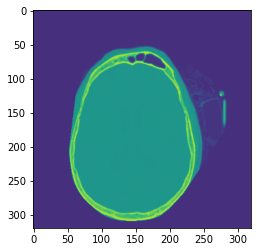

In [128]:
plt.imshow(x[0][:,:,10])

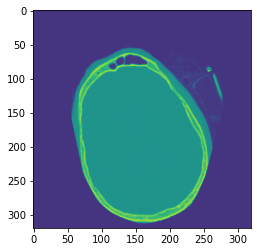

In [129]:
plt.imshow(y[0][:,:,10])

In [67]:
x[:,:,:,10:11].shape

torch.Size([16, 320, 320, 1])

In [52]:
batch = next(iter(dataloader))
batch.shape

torch.Size([16, 320, 320, 20])

TypeError: Invalid shape (320, 1290, 14) for image data

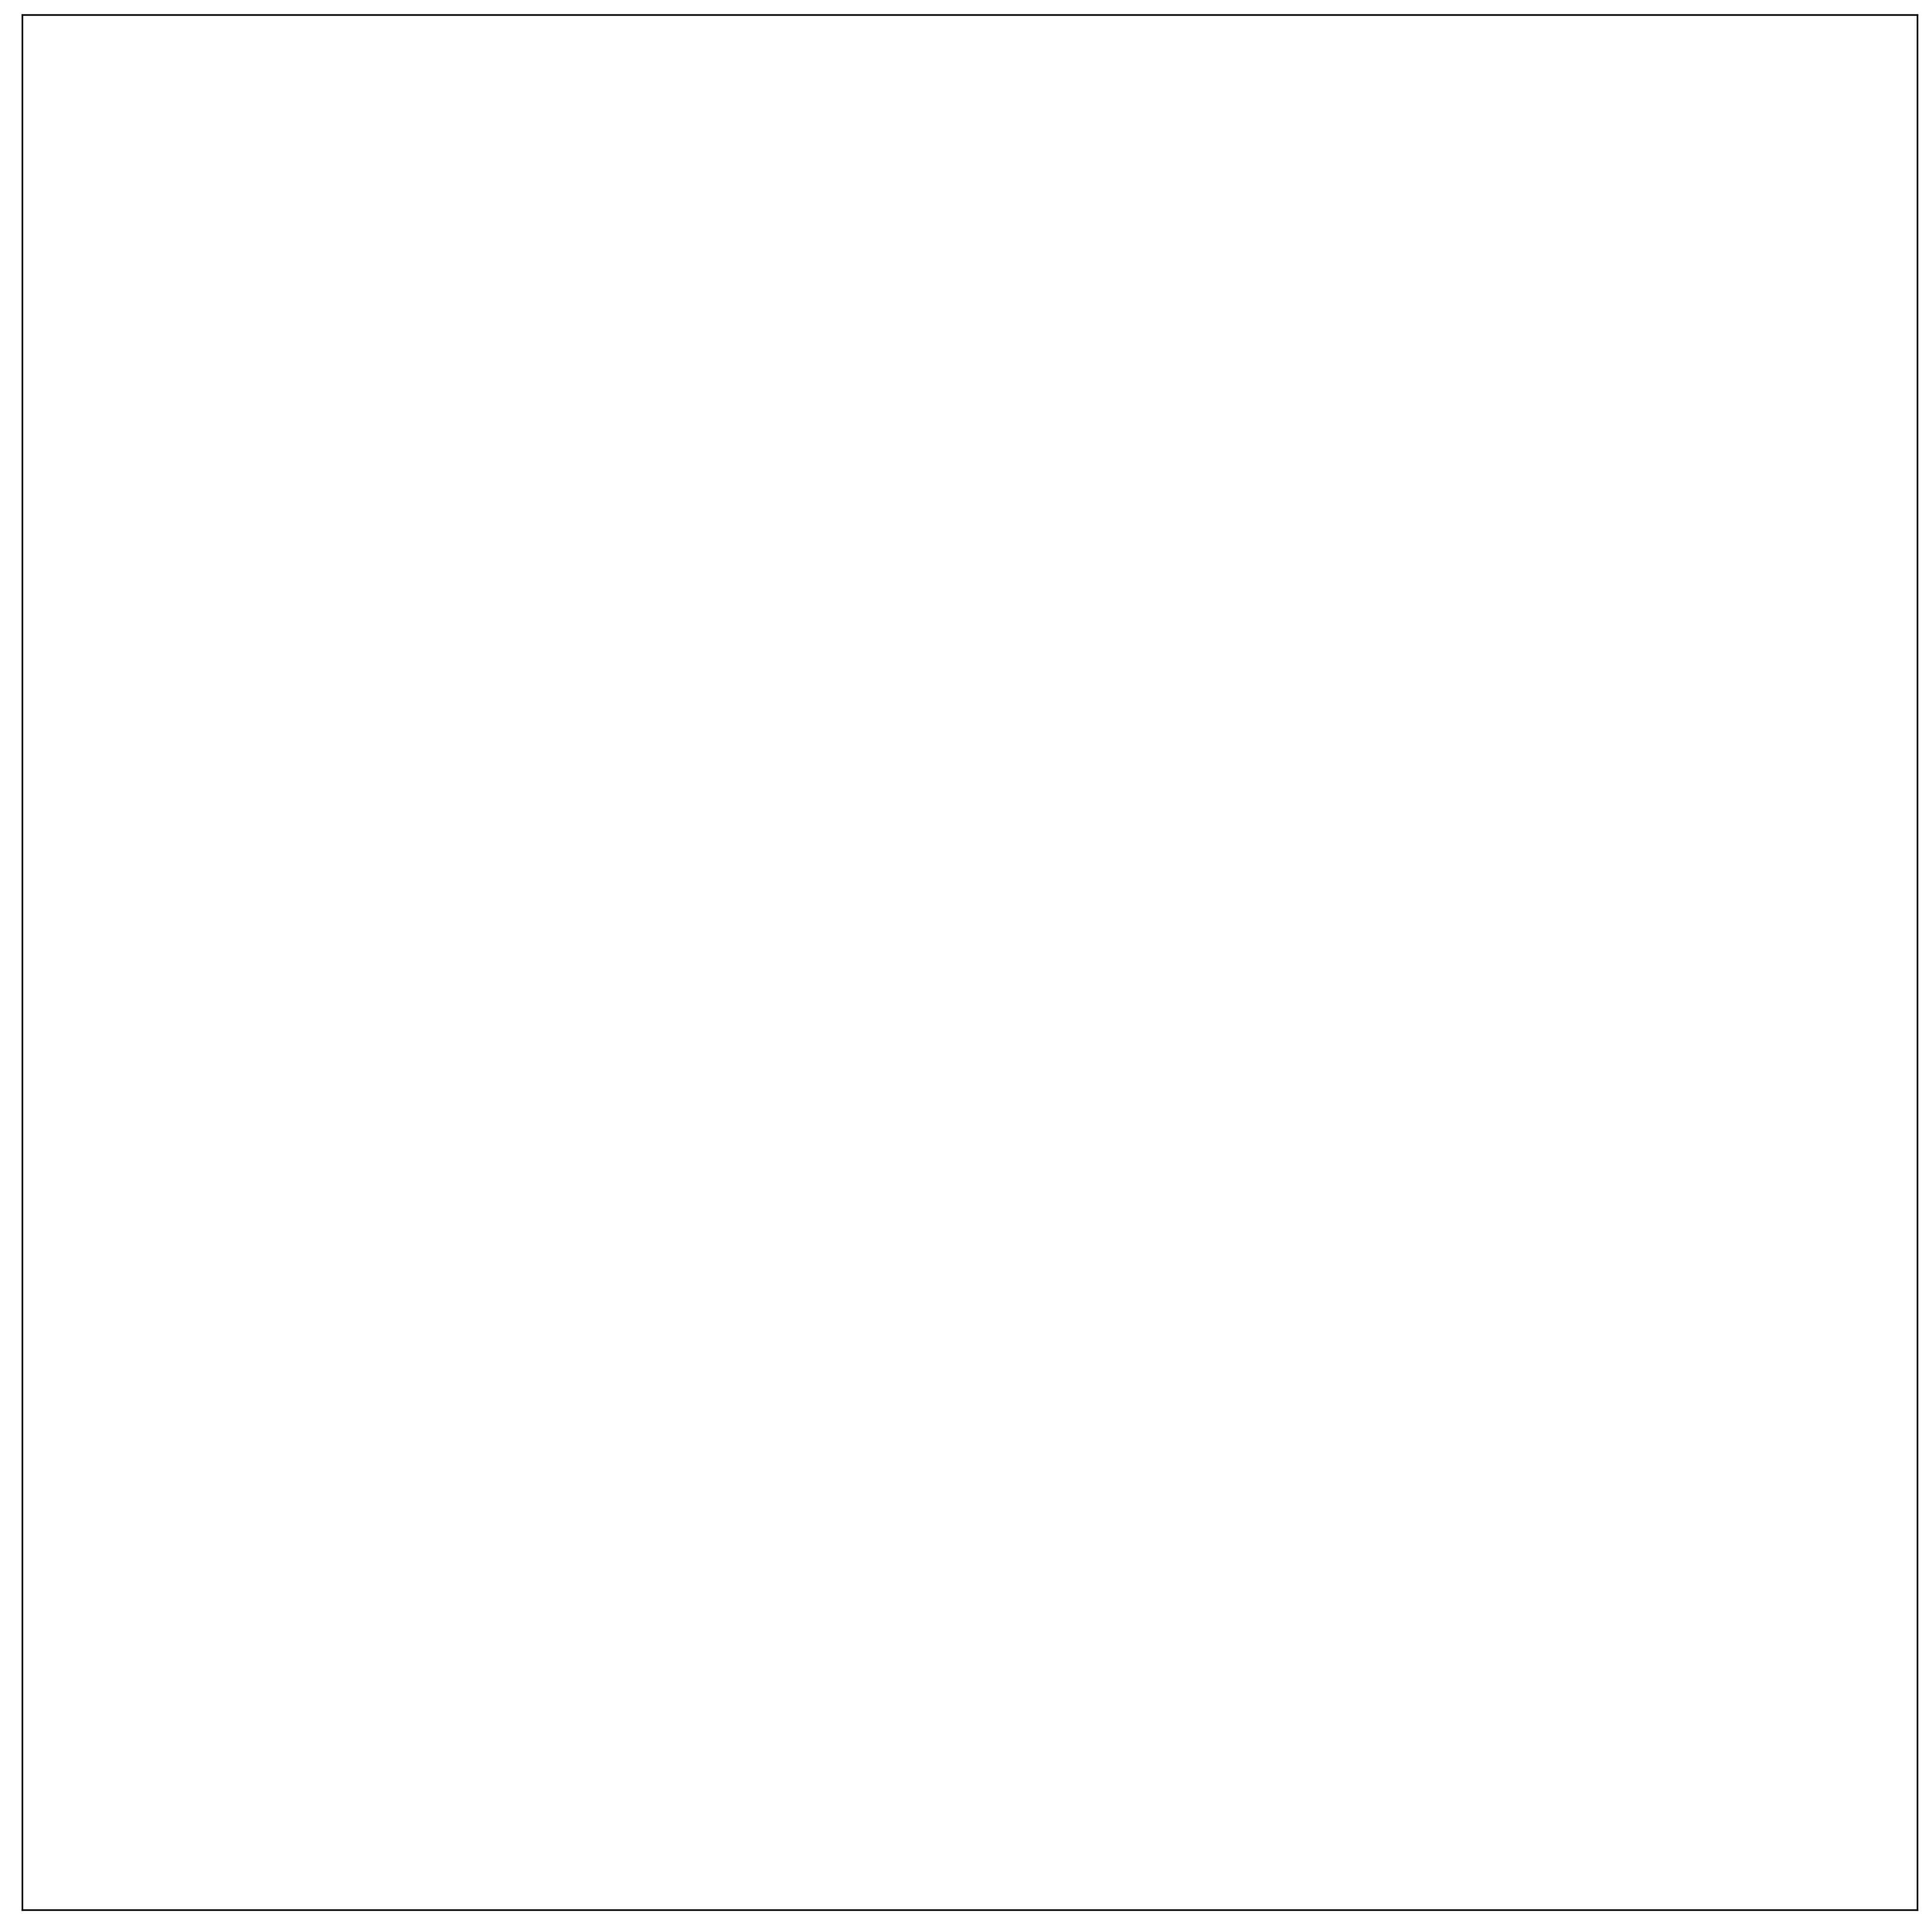

In [68]:
fig, ax = plt.subplots(figsize=(17, 17), dpi=300)
ax.set_xticks([]); ax.set_yticks([])
batch_d = list(batch.detach()[:,:,:,10:11])
grid = make_grid(batch_d, nrow=4)
ax.imshow(grid)

In [65]:
grid.shape

torch.Size([16, 320, 320])